In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = dataset.iloc[:,[3,4]].values

In [4]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

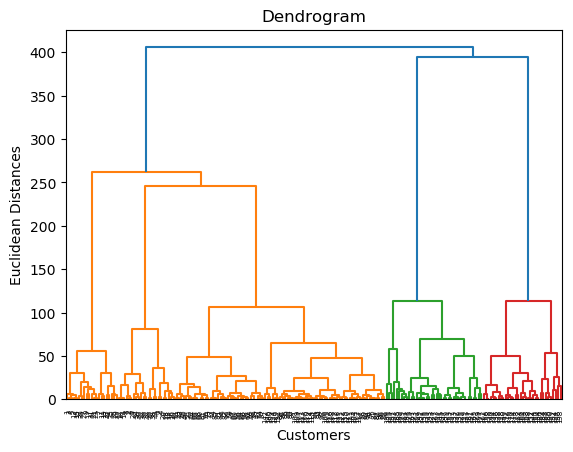

In [8]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()


In [9]:
from sklearn.cluster import AffinityPropagation
Aff_Model = AffinityPropagation()
y_Aff = Aff_Model.fit_predict(X)
y_Aff

array([ 2,  1,  0,  1,  2,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  2,
        1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  3,  2,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  2,  1,  2,  1,  2,  3,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  4,  5,  5,  4,  4,  4,  5,  4,  5,  4,
        4,  4,  4,  5,  4,  4,  5,  4,  4,  4,  5,  5,  4,  4,  5,  4,  5,
        4,  4,  5,  4,  7,  5,  8,  5,  7,  6,  8,  6,  8,  5,  8,  6,  7,
        6,  8,  6,  8,  6,  7,  5,  7,  6,  7,  5,  8,  6,  7,  6,  7,  6,
        8,  6,  7,  6,  8,  6,  8,  5,  7,  6,  7,  6,  8,  6,  7, 10,  8,
        6,  8,  6,  7,  6,  7,  6,  8, 10,  9, 10,  9, 10,  9, 10,  9, 10,
        9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9], dtype=int64)

In [10]:
supervised = pd.DataFrame(dataset)

In [11]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
supervised["Clustered_Group"]=y_Aff

In [13]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clustered_Group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,10
197,198,Male,32,126,74,9
198,199,Male,32,137,18,10


In [27]:
supervised.to_csv("Clustereddata.csv", index=False)

In [14]:
centroids = Aff_Model.cluster_centers_

In [29]:
centroids

array([[ 44.32258065,  52.12903226],
       [ 81.        ,  32.27272727],
       [109.7       ,  82.        ],
       [ 24.58333333,   9.58333333],
       [ 78.55172414,  82.17241379],
       [ 60.26530612,  49.2244898 ],
       [112.625     ,  18.625     ],
       [ 24.95      ,  81.        ],
       [ 28.18181818,  33.27272727],
       [ 79.68421053,  10.73684211]])

In [32]:
!pip install seaborn

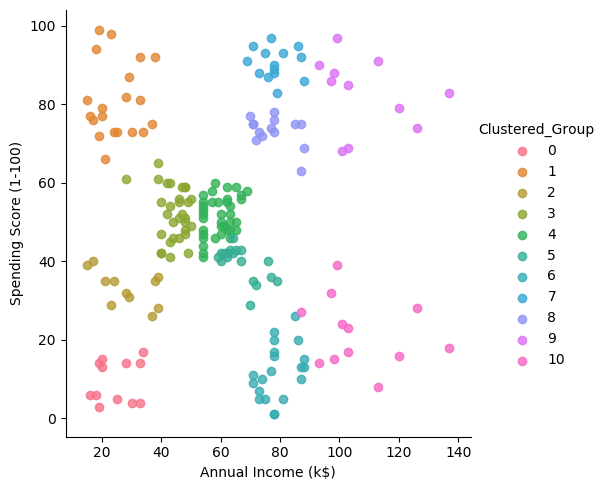

In [15]:
import seaborn as sns
fact = sns.lmplot(data=supervised, x = supervised.columns[3], y = supervised.columns[4], hue=supervised.columns[5],
                  fit_reg = False, legend = True)

In [39]:
dir(kmeans)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_transform',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']